# Support Vector Machines Classifier

In [2]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Creating Synthetic datapoints

from sklearn.datasets import make_classification

In [4]:
X,y = make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [5]:
X

array([[-1.18084448,  0.80872926],
       [ 0.10175388,  1.96924083],
       [ 2.46364686, -0.74358869],
       ...,
       [-0.89601058,  1.07895693],
       [ 2.06591701,  0.03296812],
       [-0.88995545,  1.08223565]])

In [6]:
y

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [8]:
pd.DataFrame(X)[0]

0     -1.180844
1      0.101754
2      2.463647
3      0.891995
4     -1.419848
         ...   
995    0.736161
996   -1.482019
997   -0.896011
998    2.065917
999   -0.889955
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

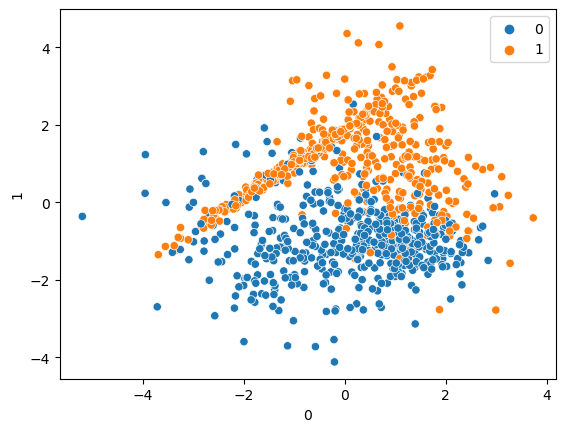

In [10]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue = y)

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=10)

In [12]:
from sklearn.svm import SVC

In [13]:
svc = SVC(kernel = 'linear')

In [14]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [15]:
svc.coef_

array([[-0.0057099,  1.3865765]])

In [16]:
# Prediction 

y_pred = svc.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       130
           1       0.82      0.82      0.82       120

    accuracy                           0.83       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.83      0.83      0.83       250



In [22]:
print(confusion_matrix(y_test,y_pred))

[[109  21]
 [ 22  98]]


In [24]:
print(accuracy_score(y_test,y_pred))

0.828


# Hyperparameter Tuning with SVC 

In [25]:
from sklearn.model_selection import GridSearchCV

# Defining parameter range

param_grid = {
    'C' : [0.1, 1, 10, 100, 1000],
    'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
}

In [30]:
grid = GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [31]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.847 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.867 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.860 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.920 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.907 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.860 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.833 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.853 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.900 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.913 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.853 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [32]:
grid.best_params_

{'C': 1000, 'gamma': 0.1}

In [33]:
## Prediction 

y_pred= grid.predict(X_test)

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       130
           1       0.89      0.92      0.91       120

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



In [35]:
print(confusion_matrix(y_test,y_pred))

[[117  13]
 [ 10 110]]
